# PROJECT-1: MONTE-CRYPTO

## MAXIMUM PORTFOLIO PERFORMANCE - PRE-COVID AND POST-COVID ANALYSIS  

##### *Cassandra Johnson, Ken Lindgren, Rawad Habib, Antonio Pinkston, Floriane Beyegue, Nigil  Jeyashekar*

### 1.0  INTRODUCTION

##### Enter Text Here

### 2.0  Importing Libraries

In [111]:
import warnings
warnings.simplefilter(action="ignore")
import pandas as pd
import numpy as np
from pathlib import Path
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact 
import hvplot.pandas
import panel as pn
import os
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

!echo %cd%

ModuleNotFoundError: No module named 'alpaca_trade_api'

#### 2.1 Load .env enviroment variables

In [ ]:
from dotenv import load_dotenv
load_dotenv()

##### 2.1.1 Set Alpaca Key

In [ ]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

### 3.0  Data Cleaning

#### 3.1  Defining Path Names for csv Files

In [ ]:
BTC_USD_path = Path("Resources/BTC-USD.csv")
ETH_USD_path = Path("Resources/ETH-USD.csv")
LTC_USD_path = Path("Resources/LTC-USD.csv")
Corn_path = Path("Resources/Corn.csv")
Soybeans_path = Path("Resources/Soybean.csv")
Wheat_path = Path("Resources/Wheat.csv")
SPY_path = Path("Resources/SPY.csv")
AMZN_path = Path("Resources/AMZN.csv")
LUV_path = Path("Resources/LUV.csv")
PFE_path = Path("Resources/PFE.csv")
AAPL_path = Path("Resources/AAPL.csv")
Gold_path = Path("Resources/Gold.csv")
Silver_path = Path("Resources/Silver.csv")
Platinum_path = Path("Resources/Platinum.csv")

#### 3.2  Defining a Function to Read csv Files as Data Frames
#####  *Sets Date to Required Format. Sets Date as Index. Drops Extraneous Columns and Null Values. Sorts Data Frame by Date.*

In [ ]:
def returns(csvpath):
    df=pd.read_csv(csvpath)
    df=df[["Date","Close"]]
    df.set_index(pd.to_datetime(df['Date'], infer_datetime_format=True), inplace=True)
    df.drop(columns=['Date'], inplace=True)
    df_1=df.sort_values(by=['Date'], ascending=True)
    df_new=df_1.dropna()
    return df_new

### 3.3  Checks to Ensure Null Values have been Dropped for all Datasets using the Function

In [ ]:
BTC_USD_df=returns(BTC_USD_path)
BTC_USD_df.columns=["BTC"]
BTC_USD_df.isnull().sum()

In [ ]:
ETH_USD_df=returns(ETH_USD_path)
ETH_USD_df.columns=["ETH"]
ETH_USD_df.isnull().sum()

In [ ]:
LTC_USD_df=returns(LTC_USD_path)
LTC_USD_df.columns=["LTC"]
LTC_USD_df.isnull().sum()

In [ ]:
Corn_df=returns(Corn_path)
Corn_df.columns=["Corn"]
Corn_df.isnull().sum()

In [ ]:
Soybeans_df=returns(Soybeans_path)
Soybeans_df.columns=["Soybeans"]
Soybeans_df.isnull().sum()

In [ ]:
Wheat_df=returns(Wheat_path)
Wheat_df.columns=["Wheat"]
Wheat_df.isnull().sum()

In [ ]:
SPY_df=returns(SPY_path)
SPY_df.columns=["SPY"]
SPY_df.isnull().sum()

In [ ]:
AMZN_df=returns(AMZN_path)
AMZN_df.columns=["AMZN"]
AMZN_df.isnull().sum()

In [ ]:
LUV_df=returns(LUV_path)
LUV_df.columns=["LUV"]
LUV_df.isnull().sum()

In [ ]:
PFE_df=returns(PFE_path)
PFE_df.columns=["PFE"]
PFE_df.isnull().sum()

In [ ]:
AAPL_df=returns(AAPL_path)
AAPL_df.columns=["AAPL"]
AAPL_df.isnull().sum()

In [ ]:
Gold_df=returns(Gold_path)
Gold_df.columns=["Gold"]
Gold_df.isnull().sum()

In [ ]:
Silver_df=returns(Silver_path)
Silver_df.columns=["Silver"]
Silver_df.isnull().sum()

In [ ]:
Platinum_df=returns(Platinum_path)
Platinum_df.columns=["Platinum"]
Platinum_df.isnull().sum()

### 3.4  Printing all the Datasets

In [ ]:
SPY_df=SPY_df.pct_change().dropna()
SPY_df.head()

In [ ]:
crypto_portfolio_data = pd.concat([BTC_USD_df, ETH_USD_df, LTC_USD_df], axis="columns", join="inner")
crypto_portfolio_data = crypto_portfolio_data.pct_change().dropna()
#crypto_portfolio_data.head()

In [ ]:
comm_portfolio_data = pd.concat([Corn_df, Soybeans_df, Wheat_df], axis="columns", join="inner")
comm_portfolio_data = comm_portfolio_data.pct_change().dropna()
#comm_portfolio_data

In [ ]:
stock_portfolio_data = pd.concat([AMZN_df, LUV_df, PFE_df, AAPL_df], axis="columns", join="inner")
stock_portfolio_data = stock_portfolio_data.pct_change().dropna()
#stock_portfolio_data

In [ ]:
metals_portfolio_data = pd.concat([Gold_df, Silver_df, Platinum_df], axis="columns", join="inner")
metals_portfolio_data = metals_portfolio_data.pct_change().dropna()
#metals_portfolio_data

## 3.5 Plotting Portfolio Daily Returns 

In [ ]:
weights_3 = [1/3, 1/3, 1/3]
crypto_portfolio_returns = crypto_portfolio_data.dot(weights_3)
crypto_portfolio_returns.head()

In [ ]:
crypto_portfolio_returns.plot(figsize=(20,10), title = "Crypto Portfolio Daily Returns")

In [ ]:
metals_portfolio_returns = metals_portfolio_data.dot(weights_3)
metals_portfolio_returns.plot(figsize=(20,10), title = "Metals Portfolio Daily Returns")

In [ ]:
comm_portfolio_returns = comm_portfolio_data.dot(weights_3)
comm_portfolio_returns.plot(figsize=(20,10), title = "Agriculture Commodities Portfolio Daily Returns")

In [ ]:
weights_4 = [0.25,0.25,0.25,0.25]
stock_portfolio_returns = stock_portfolio_data.dot(weights_4)
stock_portfolio_returns.plot(figsize=(20,10), title = "Stock Portfolio Daily Returns")

In [ ]:
SPY_df.plot(figsize=(20,10), title = "S&P500 Daily Returns")

In [ ]:
investment_returns_df = pd.concat([crypto_portfolio_returns, metals_portfolio_returns, comm_portfolio_returns, stock_portfolio_returns, SPY_df], axis="columns", join="inner")
investment_returns_df.plot(figsize = (20,10))


## 3.6 Plotting Cumulative Returns 

In [ ]:
crypto_cumulative_returns = (1 + crypto_portfolio_returns).cumprod() -1
crypto_cumulative_returns.plot(figsize=(20,10), title = "Crypto Portfolio Cumulative Returns")


In [ ]:
metals_cumulative_returns = (1 + metals_portfolio_returns).cumprod() -1
metals_cumulative_returns.plot(figsize=(20,10), title = "Metals Portfolio Cumulative Returns")

In [ ]:
comm_cumulative_returns = (1 + comm_portfolio_returns).cumprod() -1
comm_cumulative_returns.plot(figsize=(20,10), title = "Agricultural Commodities Portfolio Cumulative Returns")

In [ ]:
stock_cumulative_returns = (1 + stock_portfolio_returns).cumprod() -1
stock_cumulative_returns.plot(figsize=(20,10), title = "Stock Portfolio Cumulative Returns")

In [ ]:
SPY_cumulative_returns = (1 + SPY_df).cumprod() -1
SPY_cumulative_returns.plot(figsize=(20,10), title = "S&P500 Cumulative Returns")

In [ ]:
investment_cumulative_df = pd.concat([crypto_cumulative_returns, metals_cumulative_returns, comm_cumulative_returns, stock_cumulative_returns, SPY_cumulative_returns], axis="columns", join="inner")
investment_cumulative_df.plot(figsize = (20,10))
#investment_cumulative_df.to_csv("Resources/investment_cumulative.csv")
#crypto_cumulative

### Plotting Cumulative Returns via Dashboard

In [113]:
def crypto_cum_return():
    crypto_cumulative_returns = (1 + crypto_portfolio_returns).cumprod() -1
    crypto_return =crypto_cumulative_returns.plot(figsize=(20,10), 
                               title = "Crypto Portfolio Cumulative Returns")
    return crypto_return

def metals_cum_return():
    metals_cumulative_returns = (1 + metals_portfolio_returns).cumprod() -1
    metals_return = metals_cumulative_returns.plot(figsize=(20,10), 
                               title = "Metals Portfolio Cumulative Returns")
    return metals_return

def comm_cum_return():
    comm_cumulative_returns = (1 + comm_portfolio_returns).cumprod() -1
    comm_returns = comm_cumulative_returns.plot(figsize=(20,10),
                             title = "Agricultural Commodities Portfolio Cumulative Returns")
    return comm_returns

def stock_cum_return():
    stock_cumulative_returns = (1 + stock_portfolio_returns).cumprod() -1
    stock_returns = stock_cumulative_returns.plot(figsize=(20,10),
                              title = "Stock Portfolio Cumulative Returns")
    return stock_returns

def SPY_cum_return():
    SPY_cumulative_returns = (1 + SPY_df).cumprod() -1
    SPY_returns = SPY_cumulative_returns.plot(figsize=(20,10),
                            title = "S&P500 Cumulative Returns")
    return SPY_returns



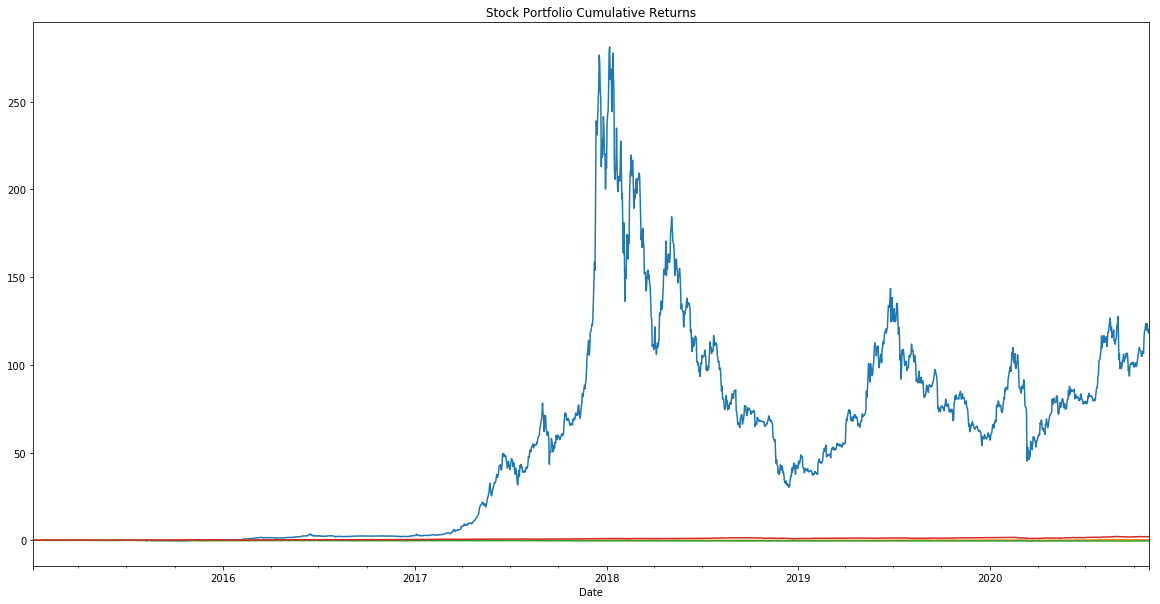

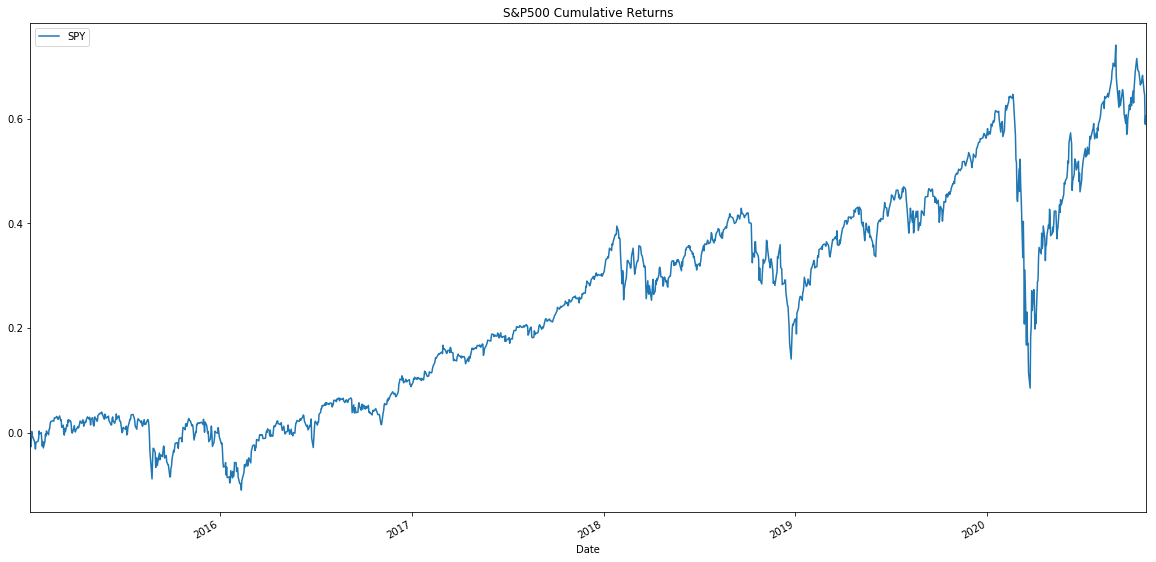

In [114]:
pn.extension()

crypto_column = pn.Column(crypto_cum_return())

metals_column = pn.Column(metals_cum_return())

comm_column = pn.Column(comm_cum_return())

stock_column = pn.Column(stock_cum_return())

SPY_column = pn.Column(SPY_cum_return())

geo_column = pn.Column(
    "## Population and Crime Geo Plots", get_population_plot(), get_crime_plot()
)

scatter_column = pn.Column(
    "## Correlation of Population and Crime Plots",
    get_population_violence(),
    get_violent_murder(),
)

# Create tabs
crime_pop_dashboard = pn.Tabs(
    ("Geospatial", geo_column), ("Correlations", scatter_column)
)

In [115]:
Dashboard = pn.Tabs(
            ("Cryptocurrency Returns",crypto_column),
            ("Metals Returns",metals_column),
            ("Agricultural Commodities Returns", comm_column),
            ("Stock Returns", stock_column),
            ("S&P 500 Returns",SPY_column))
Dashboard

Tabs
    [0] Column
        [0] Str(AxesSubplot)
    [1] Column
        [0] Str(AxesSubplot)
    [2] Column
        [0] Str(AxesSubplot)
    [3] Column
        [0] Str(AxesSubplot)
    [4] Column
        [0] Str(AxesSubplot)

### 4.0 Monte Carlo Simulations

In [ ]:
#Initial simulations setup
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes between now and 5 years ago.
start_date = pd.Timestamp("2015-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-10-30", tz="America/New_York").isoformat()

# Set the ticker information
comm_tickers = ["CORN", "WEAT", "SOYB"]
# add metals_tickers = ["Gold", "Silver", "Platinum"]
stock_tickers = ["AAPL", "AMZN", "LUV", "PFE"]
sp500_ticker = ["SPY"]
# add crypto = ???

#### 4.1 Commodities

In [ ]:
# Get 5 year's worth of historical price data for Corn, Wheat, and Soybean
comm_df_ticker = api.get_barset(
    comm_tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
comm_df_ticker.head()

In [ ]:
# Configuring a Monte Carlo simulation to forecast five years cumulative returns
comm_fiveyear = MCSimulation(
    portfolio_data = comm_df_ticker,
    weights = [.34,.33,.33],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [ ]:
# Printing the simulation input data
comm_fiveyear.portfolio_data.head()

In [ ]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
comm_fiveyear.calc_cumulative_return()

In [ ]:
# Plot simulation outcomes
comm_line_plot = comm_fiveyear.plot_simulation()

# Save the plot for future usage
comm_line_plot.get_figure().savefig("Comm_fiveyear_sim_plot.png", bbox_inches="tight")

In [ ]:
# Compute summary statistics from the simulated daily returns
comm_simulated_returns_data = {
    "mean": list(comm_fiveyear.simulated_return.mean(axis=1)),
    "median": list(comm_fiveyear.simulated_return.median(axis=1)),
    "min": list(comm_fiveyear.simulated_return.min(axis=1)),
    "max": list(comm_fiveyear.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
comm_df_simulated_returns = pd.DataFrame(comm_simulated_returns_data)

# Display sample data
comm_df_simulated_returns.head()

In [ ]:
# Use the `plot` function to visually analyze the trajectory of stock daily returns on a 1260 trading day simulation
comm_df_simulated_returns.plot(title="Simulated Daily Returns Behavior of Commodities Over the Next Five Years")

In [ ]:
# Set initial investment
comm_initial_investment = 100000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
comm_cumulative_pnl = comm_initial_investment * comm_df_simulated_returns

# Display sample data
comm_cumulative_pnl.head()

In [ ]:
# Use the 'plot' function to create a chart of the simulated profits/losses
comm_cumulative_pnl.plot(title="Simulated Outcomes of 100K Investment in Commodities Over the Next Five Years")

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
comm_tbl = comm_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(comm_tbl)

In [ ]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Coca-Cola and Microsoft stocks
comm_ci_lower = round(comm_tbl[8]*100000,2)
comm_ci_upper = round(comm_tbl[9]*100000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $100,000 in commodities"
      f" over the next 5 years will end within in the range of"
      f" ${comm_ci_lower} and ${comm_ci_upper}")


#### 4.2 Preferred Stocks

In [ ]:
# Get 5 year's worth of historical price data for Apple (AAPL), Amazon (AMZN), Southwest (LUV), and Pfizer (PFE)
stock_df_ticker = api.get_barset(
    stock_tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
stock_df_ticker.head()

In [ ]:
# Configuring a Monte Carlo simulation to forecast five years cumulative returns
stock_fiveyear = MCSimulation(
    portfolio_data = stock_df_ticker,
    weights = [.25,.25,.25,.25],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [ ]:
# Printing the simulation input data
stock_fiveyear.portfolio_data.head()

In [ ]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
stock_fiveyear.calc_cumulative_return()

In [ ]:
# Plot simulation outcomes
stock_line_plot = stock_fiveyear.plot_simulation()

# Save the plot for future usage
stock_line_plot.get_figure().savefig("Stock_fiveyear_sim_plot.png", bbox_inches="tight")

In [ ]:
# Compute summary statistics from the simulated daily returns
stock_simulated_returns_data = {
    "mean": list(stock_fiveyear.simulated_return.mean(axis=1)),
    "median": list(stock_fiveyear.simulated_return.median(axis=1)),
    "min": list(stock_fiveyear.simulated_return.min(axis=1)),
    "max": list(stock_fiveyear.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
stock_df_simulated_returns = pd.DataFrame(stock_simulated_returns_data)

# Display sample data
stock_df_simulated_returns.head()

In [ ]:
# Use the `plot` function to visually analyze the trajectory of stock daily returns on a 1260 trading day simulation
stock_df_simulated_returns.plot(title="Simulated Daily Returns Behavior of Stocks Over the Next Five Years")

In [ ]:
# Set initial investment
stock_initial_investment = 100000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
stock_cumulative_pnl = stock_initial_investment * stock_df_simulated_returns

# Display sample data
stock_cumulative_pnl.head()

In [ ]:
# Use the 'plot' function to create a chart of the simulated profits/losses
stock_cumulative_pnl.plot(title="Simulated Outcomes of 100K Investment in Stocks Over the Next Five Years")

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
stock_tbl = stock_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(stock_tbl)

In [ ]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $100,000 investments in AAPL stocks
stock_ci_lower = round(stock_tbl[8]*100000,2)
stock_ci_upper = round(stock_tbl[9]*100000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $100,000 in preferred stock"
      f" over the next year will end within in the range of"
      f" ${stock_ci_lower} and ${stock_ci_upper}.")

#### 4.3 S&P 500 Index

In [ ]:
# Get 5 year's worth of historical price data for the S&P 500 Index
sp500_df_ticker = api.get_barset(
    sp500_ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
sp500_df_ticker.head()

In [ ]:
# Configuring a Monte Carlo simulation to forecast five years cumulative returns
sp500_fiveyear = MCSimulation(
    portfolio_data = sp500_df_ticker,
    weights = [1],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [ ]:
# Printing the simulation input data
sp500_fiveyear.portfolio_data.head()

In [ ]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
sp500_fiveyear.calc_cumulative_return()

In [ ]:
# Plot simulation outcomes
sp500_line_plot = sp500_fiveyear.plot_simulation()

# Save the plot for future usage
sp500_line_plot.get_figure().savefig("S&P500 Index_fiveyear_sim_plot.png", bbox_inches="tight")

In [ ]:
# Compute summary statistics from the simulated daily returns
sp500_simulated_returns_data = {
    "mean": list(stock_fiveyear.simulated_return.mean(axis=1)),
    "median": list(stock_fiveyear.simulated_return.median(axis=1)),
    "min": list(stock_fiveyear.simulated_return.min(axis=1)),
    "max": list(stock_fiveyear.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
sp500_df_simulated_returns = pd.DataFrame(stock_simulated_returns_data)

# Display sample data
sp500_df_simulated_returns.head()

In [ ]:
# Use the `plot` function to visually analyze the trajectory of stock daily returns on a 1260 trading day simulation
sp500_df_simulated_returns.plot(title="Simulated Daily Returns Behavior of S&P 500 Index Over the Next Five Years")

In [ ]:
# Set initial investment
sp500_initial_investment = 100000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
sp500_cumulative_pnl = sp500_initial_investment * sp500_df_simulated_returns

# Display sample data
sp500_cumulative_pnl.head()

In [ ]:
# Use the 'plot' function to create a chart of the simulated profits/losses
sp500_cumulative_pnl.plot(title="Simulated Outcomes of 100K Investment in the S&P 500 Index Over the Next Five Years")

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
sp500_tbl = sp500_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(sp500_tbl)

In [ ]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $100,000 investments in AAPL stocks
sp500_ci_lower = round(sp500_tbl[8]*100000,2)
sp500_ci_upper = round(sp500_tbl[9]*100000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $100,000 in S&P 500 Index"
      f" over the next year will end within in the range of"
      f" ${sp500_ci_lower} and ${sp500_ci_upper}.")

#### 4.4 Precious Metals

#### 4.5 Cryptocurrency